# Probability

## Random Variables
Random variable is a fundamental concept in statistics that bridges the gap between theoretical probability and real-world data. random variable in statistics is a function that assigns a real value to an outcome in the sample space of a random experiment.\
Random variables are of 2 types:
* Discrete - A Discrete Random Variable takes on a finite number of values.
* Continuous - Continuous Random Variable takes on an infinite number of values.

### Discrete Random Variable
The probability function associated with it is said to be PMF (Probability Mass Function).
<p>
    If X is a discrete random variable and the PMF of X is P(xi), then
        <ul>
            <li>0 ≤ pi ≤ 1</li>
            <li>∑pi = 1 where the sum is taken over all possible values of x</li>
        </ul>
    Lets take an example:
    
    If two unbiased coins are tossed then find the random variable associated with that event.
    
    Suppose Two (unbiased) coins are tossed
    
    X = number of heads. [X is a random variable or function]
    
    Here, the sample space S = {HH, HT, TH, TT}
    
    Suppose a random variable X takes m different values i.e. sample space
    
    X = {x1, x2, x3………xm} with probabilities
    
    P(X = xi) = pi
    
    where 1 ≤ i ≤ m
    
    The probabilities must satisfy the following conditions :
        0 ≤ pi ≤ 1; where 1 ≤ i ≤ m
        p1 + p2 + p3 + ……. + pm = 1 Or we can say 0 ≤ pi ≤ 1 and ∑pi = 1
    
    Hence possible values for random variable X are 0, 1, 2.
    
    X = {0, 1, 2} where m = 3
        P(X = 0) = (Probability that number of heads is 0) = P(TT) = 1/2×1/2 = 1/4
        P(X = 1) = (Probability that number of heads is 1) = P(HT | TH) = 1/2×1/2 + 1/2×1/2 = 1/2
        P(X = 2) = (Probability that number of heads is 2) = P(HH) = 1/2×1/2 = 1/4
    Here, you can observe that, (0 ≤ p1, p2, p3 ≤ 1/2)
    
    p1 + p2 + p3 = 1/4 + 2/4 + 1/4 = 1
</p>

In [1]:
import random
sample = [1, 2, 3, 4, 5, 6]
prob_one_ele = float(1/len(sample))
data = [random.randint(1, 6) for _ in range(20)]
size = len(data)
prob_sample = {}
for ele in sample:
    count = data.count(ele)
    prob_sample[ele] = float(count/size)
for key, val in prob_sample.items():
    print(f"Probability of {key} was {prob_one_ele:.2f}, occurence was {val:.3f}.")

Probability of 1 was 0.17, occurence was 0.150.
Probability of 2 was 0.17, occurence was 0.150.
Probability of 3 was 0.17, occurence was 0.150.
Probability of 4 was 0.17, occurence was 0.200.
Probability of 5 was 0.17, occurence was 0.200.
Probability of 6 was 0.17, occurence was 0.150.


### Continuous Random Variable
The probability function associated with it is said to be PDF (Probability Density Function).
<p>
    If X is a continuous random variable. P (x < X < x + dx) = f(x)dx then,
    <ul>
        <li>0 ≤ f(x) ≤ 1; for all x</li>
        <li>∫ f(x) dx = 1 over all values of x</li>
    </ul>
    Then P (X) is said to be a PDF of the distribution.
</p>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df_male = df.query("Gender == 'Male'")
df_female = df.query("Gender == 'Female'")

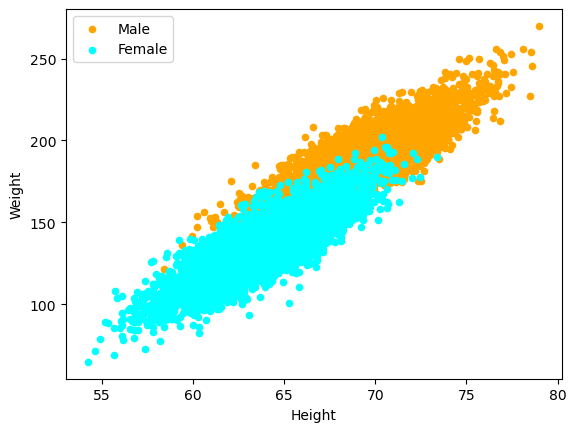

In [7]:
# fig, ax = plt.subplots()

ax = df_male.plot(kind="scatter", x="Height", y="Weight", color="Orange")
df_female.plot(ax = ax, kind="scatter", x="Height", y="Weight", color="Cyan")
ax.legend(["Male", "Female"])
plt.show()

From the above plot, it is quite clear that there is a substantial overlap between classes which would lead to errors when we will try to predict the class of a record.

In [8]:
df_grouped = df.groupby("Gender")

In [9]:
df_grouped.agg(['mean', 'median'])

Height                 Weight            
             mean     median        mean      median
Gender                                              
Female  63.708774  63.730924  135.860093  136.117583
Male    69.026346  69.027709  187.020621  187.033546

In [10]:
df_grouped.std()

,Height,Weight
Gender,,
Female,2.696284,19.022468
Male,2.863362,19.781155


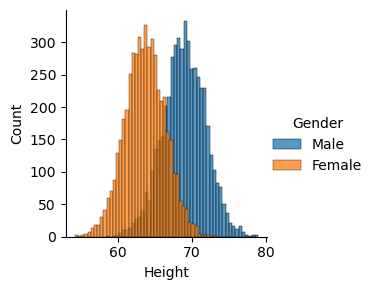

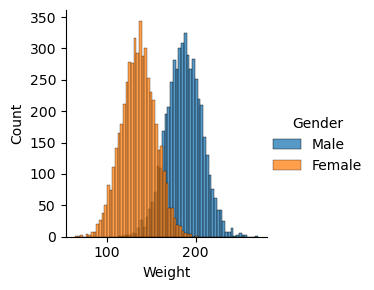

In [11]:
sns.FacetGrid(df, hue="Gender").map(sns.histplot, "Height").add_legend()
sns.FacetGrid(df, hue="Gender").map(sns.histplot, "Weight").add_legend()
plt.show()

The above plot shows us the exact area where there is an overlap and if a record's value were to fall in this area the differentiation would be extremely difficult.